In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Loading and Plotting Data

We'll be doing linear regression with one variable, and we'll use daily data set: average normalized temperature, and the total number of bike rentals.  The values for rentals are scaled by a factor of a thousand, given the  difference in magnitude between them and the normalized temperatures.

In [ ]:
# Read the data csv into dataframe


,instant,dteday,avg_temp,cnt
0,1,2011-01-01,0.363625,985
1,2,2011-01-02,0.353739,801
2,3,2011-01-03,0.189405,1349
3,4,2011-01-04,0.212122,1562
4,5,2011-01-05,0.229270,1600


In [ ]:
temperature = data['avg_temp'].values
rentals = data['cnt'].values/1000

Text(0, 0.5, 'Bike Rentals in 1000s')

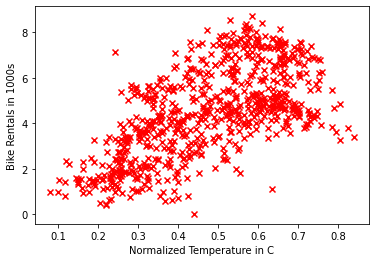

In [ ]:
plt.scatter(temperature, rentals, marker='x', color='red')
plt.xlabel('Normalized Temperature in C')
plt.ylabel('Bike Rentals in 1000s')

# Simple Linear Regression

We'll start by implementing the [cost function](https://en.wikipedia.org/wiki/Loss_function) for linear regression, specifically [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) (MSE).  Intuitively, MSE represents an aggregation of the distances between point's actual y value and what a hypothesis function $h_\theta(x)$ predicted it would be.  That hypothesis function and the cost function $J(\theta)$ are defined as

\begin{align}
h_\theta(x) & = \theta_0 + \theta_1x_1 \\
J(\theta) & = \frac{1}{2m}\sum\limits_{i = 1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2
\end{align}

where $\theta$ is a vector of feature weights, $x^{(i)}$ is the ith training example, $y^{(i)}$ is that example's y value, and $x_j$ is the value for its jth feature.

In [ ]:
def compute_cost(X, y, theta):
  # Compute cost function
  J = None
  return J

Before computing the cost with an initial guess for $\theta$, a column of 1s is prepended onto the input data.  This allows us to vectorize the cost function, as well as make it usable for multiple linear regression later.  This first value $\theta_0$ now behaves as a constant in the cost function.

In [ ]:
theta = np.zeros(2)
X = np.column_stack((np.ones(len(temperature)), temperature))
y = rentals
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost:', cost)

theta: [0. 0.]
cost: 12.018406441176468


We'll now minimize the cost using the [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) algorithm.  Intuitively, gradient descent takes small, linear hops down the slope of a function in each feature dimension, with the size of each hop determined by the partial derivative of the cost function with respect to that feature and a learning rate multiplier $\alpha$.  If tuned properly, the algorithm converges on a global minimum by iteratively adjusting feature weights $\theta$ of the cost function, as shown here for two feature dimensions:

\begin{align}
\theta_0 & := \theta_0 - \alpha\frac{\partial}{\partial\theta_0} J(\theta_0,\theta_1) \\
\theta_1 & := \theta_1 - \alpha\frac{\partial}{\partial\theta_1} J(\theta_0,\theta_1) 
\end{align}

The update rule each iteration then becomes:

\begin{align}
\theta_0 & := \theta_0 - \alpha\frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}) \\
\theta_1 & := \theta_1 - \alpha\frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_1^{(i)} \\
\end{align}

See [here](http://mccormickml.com/2014/03/04/gradient-descent-derivation/) for a more detailed explanation of how the update equations are derived.

In [ ]:
def gradient_descent(X, y, alpha, iterations):
    # implement gradient descent algorithm
    theta = None

    return theta

In [ ]:
iterations = 5000
alpha = 0.1

theta = gradient_descent(X, y, alpha, iterations)
cost = compute_cost(X, y, theta)

print("theta:", theta)
print('cost:', compute_cost(X, y, theta))

theta: [0.94588081 7.50171673]
cost: 1.1275869258439812


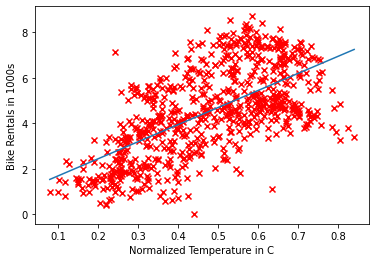

In [ ]:
# [TODO] Plot the data as well as regressed line


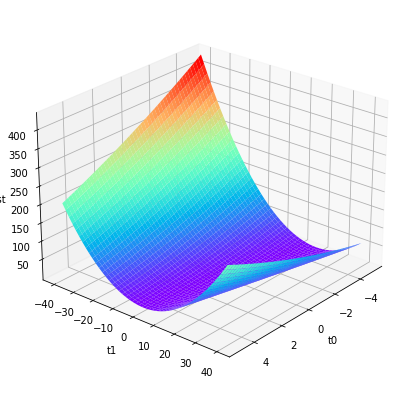

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Xs, Ys = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-40, 40, 50))
Zs = np.array([compute_cost(X, y, [t0, t1]) for t0, t1 in zip(np.ravel(Xs), np.ravel(Ys))])
Zs = np.reshape(Zs, Xs.shape)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection="3d")
ax.set_xlabel(r't0')
ax.set_ylabel(r't1')
ax.set_zlabel(r'cost')
ax.view_init(elev=25, azim=40)
ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)

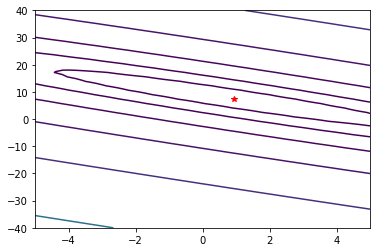

In [ ]:
ax = plt.figure().gca()
ax.plot(theta[0], theta[1], 'r*')
plt.contour(Xs, Ys, Zs, np.logspace(-3, 3, 15))